<a href="https://colab.research.google.com/github/ilyas122/CMPE_255-Data-Mining/blob/main/assignment_2A_fnu_MohammedIlyasAhmed.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1-1

Optimum L2 penalty: 70
Optimized weight values: [-8.59597450e-01  1.27851166e+00 -3.93240113e-01  1.85589487e-01
 -6.53640086e-02  1.78603877e-02 -3.58960359e-03  2.48191565e-03
  3.32342932e-02 -3.96250962e-02 -6.06807250e-04  1.48469126e-02
 -4.90457829e-03 -6.04037650e-04  5.83997923e-04 -1.07513487e-04
  6.53092823e-06]
RMSE on training data: 1.53
RMSE on validation data: 1.56
RMSE on test data: 1.80


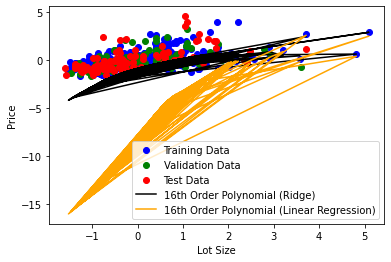

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load the housing data
data = pd.read_excel('/housing.xlsx')
# Normalize numerical features
data['price'] = (data['price'] - data['price'].mean()) / data['price'].std()
data['lotsize'] = (data['lotsize'] - data['lotsize'].mean()) / data['lotsize'].std()
data['bedrooms'] = (data['bedrooms'] - data['bedrooms'].mean()) / data['bedrooms'].std()
data['bathrms'] = (data['bathrms'] - data['bathrms'].mean()) / data['bathrms'].std()
data['stories'] = (data['stories'] - data['stories'].mean()) / data['stories'].std()
data['garagepl'] = (data['garagepl'] - data['garagepl'].mean()) / data['garagepl'].std()

# Convert categorical variables to numerical values
data['driveway'] = data['driveway'].map({'yes': 1, 'no': 0})
data['recroom'] = data['recroom'].map({'yes': 1, 'no': 0})
data['fullbase'] = data['fullbase'].map({'yes': 1, 'no': 0})
data['gashw'] = data['gashw'].map({'yes': 1, 'no': 0})
data['airco'] = data['airco'].map({'yes': 1, 'no': 0})
data['prefarea'] = data['prefarea'].map({'yes': 1, 'no': 0})
# Split the data into train/valid/test datasets with a ratio of 60%/20%/20%
np.random.seed(41)
data = data.sample(frac=1).reset_index(drop=True)
n = data.shape[0]
train_ratio = 0.6
valid_ratio = 0.2
train_end = int(n * train_ratio)
valid_end = train_end + int(n * valid_ratio)
X_train = data.iloc[:train_end, 1].values.reshape(-1, 1)
y_train = data.iloc[:train_end, 0].values.reshape(-1, 1)
X_val = data.iloc[train_end:valid_end, 1].values.reshape(-1, 1)
y_val = data.iloc[train_end:valid_end, 0].values.reshape(-1, 1)
X_test = data.iloc[valid_end:, 1].values.reshape(-1, 1)
y_test = data.iloc[valid_end:, 0].values.reshape(-1, 1)


def poly_reg_ridge(X, y, order, lam):
    X_poly = poly_features(X, order)
    n = X_poly.shape[1]
    lam_matrix = lam * np.eye(n)
    w = np.linalg.inv(np.dot(X_poly.T, X_poly) + lam_matrix).dot(X_poly.T).dot(y)
    return w

# Define the function to create the polynomial feature matrix
def poly_features(X, order):
    X_poly = np.ones((X.shape[0], order+1))
    for i in range(1, order+1):
        X_poly[:, i] = X[:, 0] ** i
    return X_poly

# Search for the optimum L2 penalty value based on RMSE of validation data
lams = [0.1, 0.3, 0.7, 1, 3, 7, 10, 70, 100,200]
min_rmse_val = np.inf
opt_lam = None
for lam in lams:
    w = poly_reg_ridge(X_train, y_train, order=16, lam=lam)
    y_val_pred = np.dot(poly_features(X_val, 16), w)
    rmse_val = np.sqrt(np.mean((y_val - y_val_pred) ** 2))
    if rmse_val < min_rmse_val:
        min_rmse_val = rmse_val
        opt_lam = lam

# Fit the training data using the 16th order polynomial regression model and Ridge (L2 penalty) regularization
w_opt = poly_reg_ridge(X_train, y_train, order=16, lam=opt_lam)

# Predict on the test data
y_train_pred = np.dot(poly_features(X_train, 16), w_opt)
y_val_pred = np.dot(poly_features(X_val, 16), w_opt)
y_test_pred = np.dot(poly_features(X_test, 16), w_opt)

# Compute the RMSE on the training/validation/test data
rmse_train = np.sqrt(np.mean((y_train - y_train_pred) ** 2))
rmse_val = np.sqrt(np.mean((y_val - y_val_pred) **2))
rmse_test = np.sqrt(np.mean((y_test - y_test_pred) ** 2))

print(f"Optimum L2 penalty: {opt_lam}")
print(f"Optimized weight values: {w_opt.flatten()}")

print(f"RMSE on training data: {rmse_train:.2f}")
print(f"RMSE on validation data: {rmse_val:.2f}")
print(f"RMSE on test data: {rmse_test:.2f}")

# Plot the train/valid/test data with the optimized weight values based on the optimum L2 penalty
plt.scatter(X_train, y_train, color='blue', label='Training Data')
plt.scatter(X_val, y_val, color='green', label='Validation Data')
plt.scatter(X_test, y_test, color='red', label='Test Data')
plt.plot(X_train, np.dot(poly_features(X_train, 16), w_opt), color='black', label='16th Order Polynomial (Ridge)')
plt.plot(X_train, np.dot(poly_features(X_train, 16), poly_reg_ridge(X_train, y_train, order=16, lam=0)), color='orange', label='16th Order Polynomial (Linear Regression)')
plt.xlabel('Lot Size')
plt.ylabel('Price')
plt.legend()
plt.show()



1-2

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.197e+02, tolerance: 3.011e-02
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.395e+02, tolerance: 3.011e-02
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.417e+02, tolerance: 3.011e-02

Optimized L1 penalty value: 0.1


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.197e+02, tolerance: 3.011e-02
  model = cd_fast.enet_coordinate_descent(


Optimized weight coefficients: [ 0.00000000e+00  4.84992365e-01 -0.00000000e+00  0.00000000e+00
 -0.00000000e+00 -2.83266188e-03 -5.70510935e-03  1.86616336e-03
  1.35240664e-04 -1.18565699e-05 -5.11405185e-06 -9.18469878e-07
 -1.23392291e-07 -9.84998305e-09  8.83304301e-10  6.70263725e-10
  2.13325556e-10]
Linear regression model weight coefficients: [[ 0.00000000e+00  9.93144246e-01  1.23268457e+00  1.51441521e+00
  -3.62101309e+00 -4.46749976e+00  4.80126209e+00  3.20741621e+00
  -3.52348245e+00 -4.93518164e-01  1.24715140e+00 -2.71199959e-01
  -1.23463932e-01  7.62350335e-02 -1.65923664e-02  1.70387463e-03
  -6.91439649e-05]]


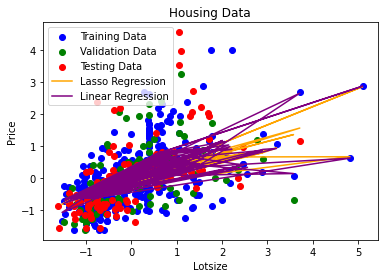

Training RMSE: 0.7957047812736782
Validation RMSE: 0.8099488963395552
Testing RMSE: 0.9570373128174281


In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error



# Define polynomial features
poly = PolynomialFeatures(degree=16)
X_train_poly = poly.fit_transform(X_train)
X_val_poly = poly.transform(X_val)
X_test_poly = poly.transform(X_test)

# Fit Lasso regularization model with 16th order polynomial features
l1_penalties = [0.1, 0.3, 0.7, 1, 3, 7, 10, 30, 70, 100]
best_l1_penalty = None
best_val_rmse = float('inf')
for l1_penalty in l1_penalties:
    model = Lasso(alpha=l1_penalty, max_iter=100000)
    model.fit(X_train_poly, y_train)
    val_pred = model.predict(X_val_poly)
    val_rmse = np.sqrt(mean_squared_error(y_val, val_pred))
    if val_rmse < best_val_rmse:
        best_val_rmse = val_rmse
        best_l1_penalty = l1_penalty

# Print optimized L1 penalty value
print("Optimized L1 penalty value:", best_l1_penalty)

# Fit Lasso regularization model with optimized L1 penalty
model = Lasso(alpha=best_l1_penalty, max_iter=100000)
model.fit(X_train_poly, y_train)

# Print optimized weight coefficients
print("Optimized weight coefficients:", model.coef_)

# Fit linear regression model without regularization
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_train_poly, y_train)

# Print linear regression model's weight coefficients
print("Linear regression model weight coefficients:", lin_reg.coef_)

# Plot 'price' vs 'lotsize' for Lasso regularization model with optimized L1 penalty
import matplotlib.pyplot as plt
%matplotlib inline

plt.scatter(X_train, y_train, color='blue', label='Training Data')
plt.scatter(X_val, y_val, color='green', label='Validation Data')
plt.scatter(X_test, y_test, color='red', label='Testing Data')
plt.plot(X_train, model.predict(X_train_poly), color='orange', label='Lasso Regression')
plt.plot(X_train, lin_reg.predict(X_train_poly), color='purple', label='Linear Regression')
plt.xlabel('Lotsize')
plt.ylabel('Price')
plt.title('Housing Data')
plt.legend()
plt.show()

# Print RMSE for training/validation/test data based on optimized L1 penalty
train_pred = model.predict(X_train_poly)
val_pred = model.predict(X_val_poly)
test_pred = model.predict(X_test_poly)

train_rmse = np.sqrt(mean_squared_error(y_train, train_pred))
val_rmse = np.sqrt(mean_squared_error(y_val, val_pred))
test_rmse = np.sqrt(mean_squared_error(y_test, test_pred))

print("Training RMSE:", train_rmse)
print("Validation RMSE:", val_rmse)
print("Testing RMSE:", test_rmse)
